In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape # training my model

(891, 12)

In [6]:
test.shape # Unseen data

(418, 11)

In [7]:
train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

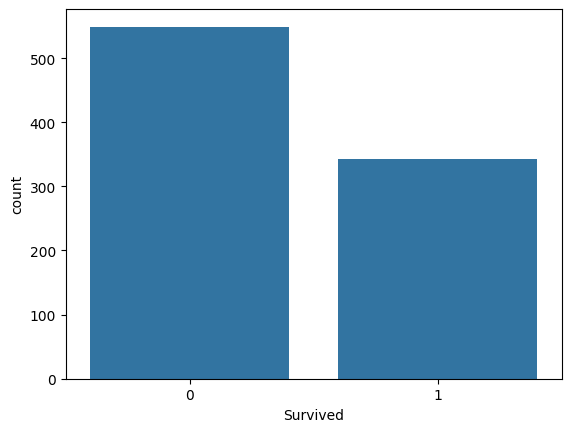

In [8]:
sns.countplot(x = train['Survived'])

<Axes: xlabel='Survived', ylabel='count'>

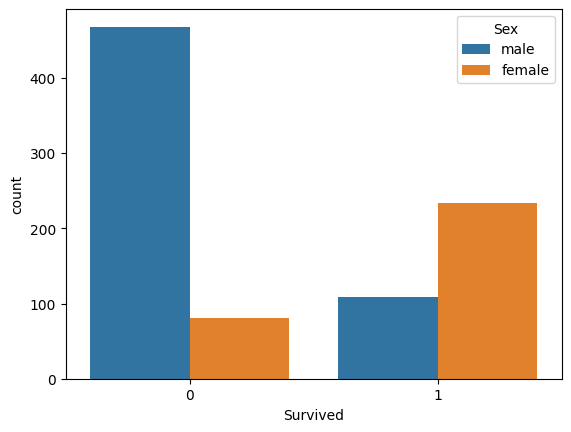

In [9]:
sns.countplot(x = train['Survived'], hue = train['Sex'])

In [10]:
# code which shows percentage of female passengers and male passengers survived.

In [11]:
train_female = train[train['Sex']== 'female']
len(train_female[train_female['Survived'] == 1]) / len(train_female)

0.7420382165605095

In [12]:
train_male = train[train['Sex']== 'male']
len(train_male[train_male['Survived'] == 1]) / len(train_male)

0.18890814558058924

<Axes: ylabel='Age'>

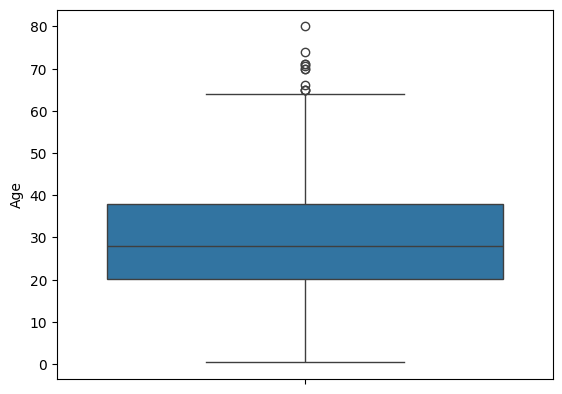

In [13]:
sns.boxplot(train['Age'])

In [14]:
print(train.isnull().sum())

print('*'*50)

print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
**************************************************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<Axes: ylabel='Age'>

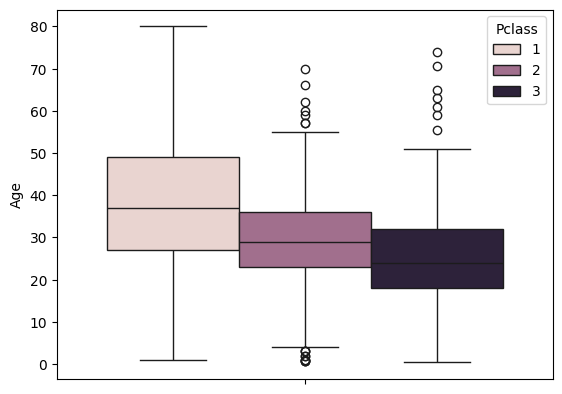

In [15]:
sns.boxplot(y=train['Age'], hue = train['Pclass'])

In [16]:
def add_age(cols):
    age = cols[0]
    Pclass = cols[1]
    if pd.isnull(age):
        return int(train[train['Pclass']== Pclass]['Age'].mean())
    else:
        return age

In [17]:
train['Age'] = train[['Age', 'Pclass']].apply(add_age, axis = 1)
test['Age'] = test[['Age', 'Pclass']].apply(add_age, axis = 1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_83940\1840781109.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = cols[0]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_83940\1840781109.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_83940\1840781109.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = cols[0]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8394

In [18]:
train.drop(columns = "Cabin", inplace = True)
test.drop(columns = "Cabin", inplace = True)

In [19]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [20]:
print(train.isnull().sum())

print('*'*50)

print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
**************************************************
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [21]:
def combine(df, col1, col2):
    df['Family'] = df[col1] + df[col2]
    df.drop([col1,col2], inplace = True, axis = 1)
    return df

In [22]:
train = combine(train, 'SibSp', 'Parch')
test = combine(test, 'SibSp', 'Parch')

In [23]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,0


In [24]:
def process_age(df, cut_points, label_names):
    df['Age'] = df['Age'].fillna(-0.5)
    df['age_categories'] = pd.cut(df['Age'], cut_points, labels = label_names)
    return df

In [25]:
cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", "Infant", "Child", "Teenager", "Young_Adult", "Adult", "Senior"]

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

In [26]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family,age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,Young_Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,Young_Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,Young_Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,Young_Adult
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,0,Young_Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,0,Young_Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,W./C. 6607,23.4500,S,3,Young_Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,0,Young_Adult


In [27]:
pivot_table = train.pivot_table(index='age_categories', values= 'Survived')
pivot_table

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_83940\1884778200.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = train.pivot_table(index='age_categories', values= 'Survived')


,Survived
age_categories,
Infant,0.704545
Child,0.360000
Teenager,0.428571
Young_Adult,0.346535
Adult,0.408889
Senior,0.227273


In [28]:
def one_hot_encoding(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name, drop_first=True)
    df = pd.concat([df, dummies], axis = 1)
    return df

In [29]:
train.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Name                object
Sex                 object
Age                float64
Ticket              object
Fare               float64
Embarked            object
Family               int64
age_categories    category
dtype: object

In [30]:
cols = [ 'Sex' , 'Embarked', 'age_categories']

for col in cols:
    train = one_hot_encoding(train, col)
    test = one_hot_encoding(train, col)
 

In [31]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family,age_categories,Sex_male,Embarked_Q,Embarked_S,age_categories_Infant,age_categories_Child,age_categories_Teenager,age_categories_Young_Adult,age_categories_Adult,age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,Young_Adult,True,False,True,False,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,Adult,False,False,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,Young_Adult,False,False,True,False,False,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,Young_Adult,False,False,True,False,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,Young_Adult,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,0,Young_Adult,True,False,True,False,False,False,True,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,0,Young_Adult,False,False,True,False,False,False,True,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,W./C. 6607,23.4500,S,3,Young_Adult,False,False,True,False,False,False,True,False,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,0,Young_Adult,True,False,False,False,False,False,True,False,False


In [32]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Embarked', 'Family', 'age_categories', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'age_categories_Infant',
       'age_categories_Child', 'age_categories_Teenager',
       'age_categories_Young_Adult', 'age_categories_Adult',
       'age_categories_Senior'],
      dtype='object')

In [33]:
train.drop(columns = ['PassengerId', 'Name', 'Sex', 'Age','Ticket',
       'Fare','age_categories', 'Embarked', 'Pclass'], inplace = True)
test.drop(columns = ['PassengerId', 'Name', 'Sex', 'Age','Ticket',
       'Fare','age_categories', 'Embarked', 'Pclass'], inplace = True)


In [34]:
train

,Survived,Family,Sex_male,Embarked_Q,Embarked_S,age_categories_Infant,age_categories_Child,age_categories_Teenager,age_categories_Young_Adult,age_categories_Adult,age_categories_Senior
0,0,1,True,False,True,False,False,False,True,False,False
1,1,1,False,False,False,False,False,False,False,True,False
2,1,0,False,False,True,False,False,False,True,False,False
3,1,1,False,False,True,False,False,False,True,False,False
4,0,0,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,True,False,True,False,False,False,True,False,False
887,1,0,False,False,True,False,False,False,True,False,False
888,0,3,False,False,True,False,False,False,True,False,False
889,1,0,True,False,False,False,False,False,True,False,False


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')



X = train.drop(columns = 'Survived')
y = train[['Survived']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
prediction = lr.predict(X_test)

In [39]:
print(confusion_matrix(y_test, prediction))

[[91 14]
 [23 51]]


In [40]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



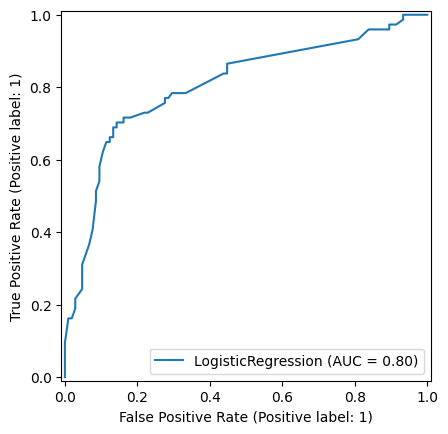

In [41]:
RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.show()

In [42]:
y_pred_proba = lr.predict_proba(X_test)
y_pred_proba

array([[0.80532631, 0.19467369],
       [0.83151978, 0.16848022],
       [0.83151978, 0.16848022],
       [0.23165554, 0.76834446],
       [0.21494283, 0.78505717],
       [0.24170565, 0.75829435],
       [0.26544371, 0.73455629],
       [0.92387415, 0.07612585],
       [0.33145173, 0.66854827],
       [0.36358515, 0.63641485],
       [0.83370048, 0.16629952],
       [0.78923606, 0.21076394],
       [0.50591891, 0.49408109],
       [0.69770834, 0.30229166],
       [0.78923606, 0.21076394],
       [0.36926841, 0.63073159],
       [0.83370048, 0.16629952],
       [0.26544371, 0.73455629],
       [0.83151978, 0.16848022],
       [0.78923606, 0.21076394],
       [0.83151978, 0.16848022],
       [0.83151978, 0.16848022],
       [0.29909858, 0.70090142],
       [0.83151978, 0.16848022],
       [0.83151978, 0.16848022],
       [0.93748703, 0.06251297],
       [0.6365217 , 0.3634783 ],
       [0.83151978, 0.16848022],
       [0.71317349, 0.28682651],
       [0.24170565, 0.75829435],
       [0.

In [43]:
y_pred_proba = y_pred_proba[:, 1]
y_pred_proba

array([0.19467369, 0.16848022, 0.16848022, 0.76834446, 0.78505717,
       0.75829435, 0.73455629, 0.07612585, 0.66854827, 0.63641485,
       0.16629952, 0.21076394, 0.49408109, 0.30229166, 0.21076394,
       0.63073159, 0.16629952, 0.73455629, 0.16848022, 0.21076394,
       0.16848022, 0.16848022, 0.70090142, 0.16848022, 0.16848022,
       0.06251297, 0.3634783 , 0.16848022, 0.28682651, 0.75829435,
       0.16848022, 0.75829435, 0.3634783 , 0.75829435, 0.12868073,
       0.24449975, 0.16848022, 0.73455629, 0.87027346, 0.16848022,
       0.10156544, 0.13145057, 0.16848022, 0.15162352, 0.8684967 ,
       0.04395234, 0.16848022, 0.16848022, 0.16848022, 0.24162102,
       0.9597855 , 0.69761094, 0.05846345, 0.1067559 , 0.20715997,
       0.56060055, 0.16848022, 0.8684967 , 0.75829435, 0.73455629,
       0.16848022, 0.63073159, 0.70090142, 0.21076394, 0.15162352,
       0.8052539 , 0.16848022, 0.16848022, 0.14980132, 0.8684967 ,
       0.63641485, 0.60351044, 0.30229166, 0.83145507, 0.16848

In [44]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


In [45]:
y_test.values.reshape(-1)

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1])

In [46]:
y_pred_final = pd.DataFrame({'Churn' : y_test.values.reshape(-1), 'Churn_proba': y_pred_proba})
y_pred_final['ID'] = X_test.index

In [47]:
y_pred_final['Predicted'] = y_pred_final.Churn_proba.map(lambda x : 1 if x > 0.5 else 0)
y_pred_final

,Churn,Churn_proba,ID,Predicted
0,1,0.194674,709,0
1,0,0.168480,439,0
2,0,0.168480,840,0
3,1,0.768344,720,1
4,1,0.785057,39,1
...,...,...,...,...
174,0,0.128681,433,0
175,0,0.302292,773,0
176,1,0.417978,25,0
177,1,0.695744,84,1


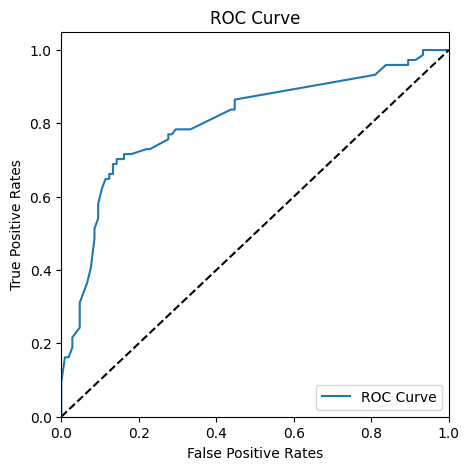

In [48]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize = (5,5))
    plt.plot(fpr, tpr, label = 'ROC Curve')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rates')
    plt.ylabel('True Positive Rates')
    plt.title('ROC Curve')
    plt.legend(loc = "lower right")
    plt.show()
    return None

draw_roc(y_pred_final.Churn, y_pred_final.Churn_proba)

In [49]:
cutoff_df = pd.DataFrame(columns = ['prob', 'accuracy', 'sensi', 'speci'])

In [50]:
numbers = [float(x)/10 for x in range(10)]
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [51]:
for i in numbers:
    y_pred_final[i] = y_pred_final.Churn_proba.map(lambda x: 1 if x> i else 0)

y_pred_final.head()

,Churn,Churn_proba,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.194674,709,0,1,1,0,0,0,0,0,0,0,0
1,0,0.168480,439,0,1,1,0,0,0,0,0,0,0,0
2,0,0.168480,840,0,1,1,0,0,0,0,0,0,0,0
3,1,0.768344,720,1,1,1,1,1,1,1,1,1,0,0
4,1,0.785057,39,1,1,1,1,1,1,1,1,1,0,0


In [52]:
num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = confusion_matrix(y_pred_final.Churn, y_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1])/ total1
    speci = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.446927  1.000000  0.057143
0.2   0.2  0.670391  0.837838  0.552381
0.3   0.3  0.737430  0.756757  0.723810
0.4   0.4  0.787709  0.716216  0.838095
0.5   0.5  0.793296  0.689189  0.866667
0.6   0.6  0.787709  0.662162  0.876190
0.7   0.7  0.748603  0.513514  0.914286
0.8   0.8  0.659218  0.243243  0.952381
0.9   0.9  0.603352  0.040541  1.000000


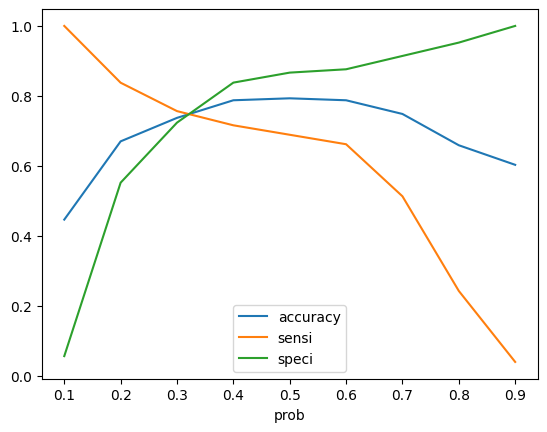

In [53]:
cutoff_df.plot.line(x='prob', y = ['accuracy', 'sensi', 'speci'])
plt.show() # 0.8

In [54]:
lr_cv = LogisticRegression()
scores = cross_val_score(lr_cv, X_train, y_train, cv = 5)  # cross validation

scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.76760563 0.77464789 0.7972028  0.82517483 0.83802817]
0.8005318625036935


In [55]:
y_pred_test = lr.predict(X_test)

In [56]:
y_pred_test

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [57]:
pred_df = pd.DataFrame(y_pred_test, columns=['Survival_pred'])

<Axes: xlabel='Survival_pred', ylabel='count'>

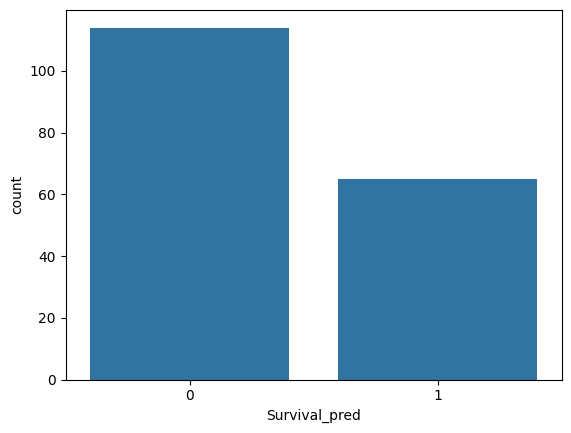

In [58]:
sns.countplot(x = pred_df['Survival_pred'])

## KNN ALGORITHM 

In [59]:
X_train.head()

,Family,Sex_male,Embarked_Q,Embarked_S,age_categories_Infant,age_categories_Child,age_categories_Teenager,age_categories_Young_Adult,age_categories_Adult,age_categories_Senior
331,0,True,False,True,False,False,False,False,True,False
733,0,True,False,True,False,False,False,True,False,False
382,0,True,False,True,False,False,False,True,False,False
704,1,True,False,True,False,False,False,True,False,False
813,6,False,False,True,False,True,False,False,False,False


In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
k = 3

knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

In [62]:
y_pred = knn.predict(X_test)


In [63]:
print(confusion_matrix(y_test, y_pred))
print('*'*50)
print(classification_report(y_test, y_pred))

[[94 11]
 [33 41]]
**************************************************
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       105
           1       0.79      0.55      0.65        74

    accuracy                           0.75       179
   macro avg       0.76      0.72      0.73       179
weighted avg       0.76      0.75      0.74       179



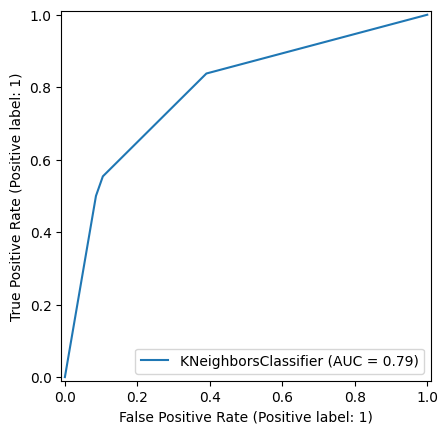

In [65]:
RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.show()

Text(0.5, 1.0, 'Error Rate K Value')

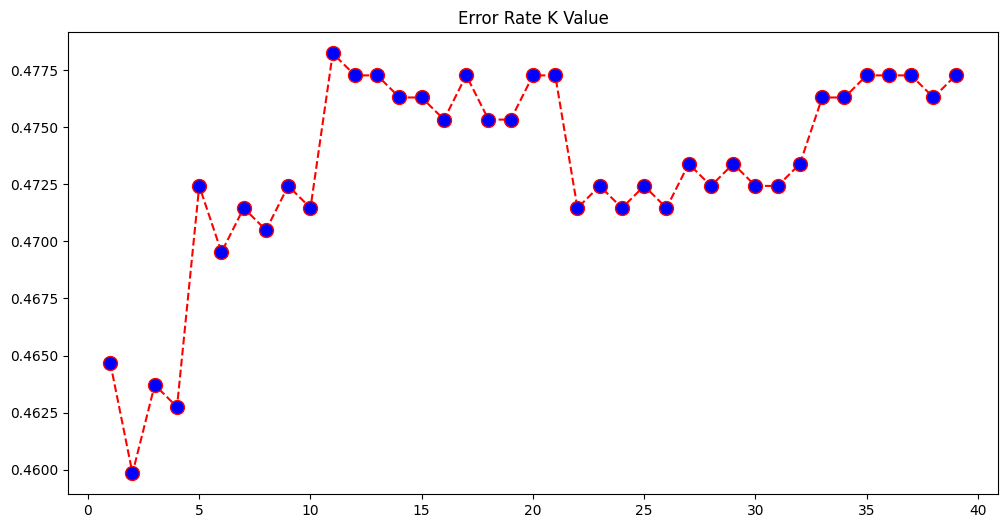

In [70]:
pred_i = np.array(pred_i)
y_test = np.array(y_test)

k = 40

error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize = (12,6))
plt.plot(range(1,40), error_rate, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')

In [71]:
knn = KNeighborsClassifier(n_neighbors = 21).fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('*'*50)
print(classification_report(y_test, y_pred))

[[91 14]
 [22 52]]
**************************************************
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



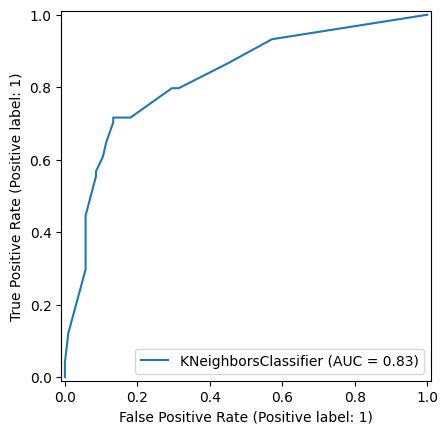

In [72]:
RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.show()

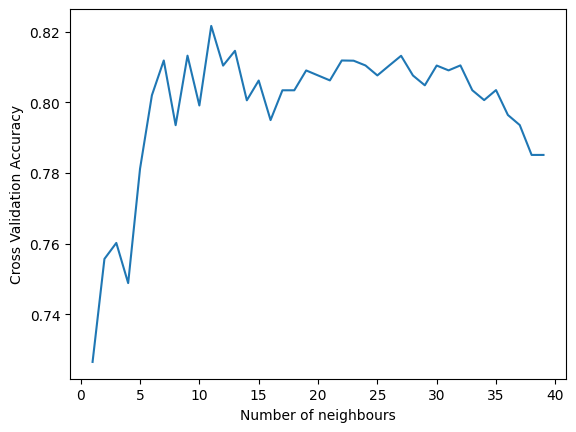

In [76]:
from sklearn.model_selection import cross_val_score


cv_scores = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring='accuracy')
    cv_scores.append(scores.mean())

k_values = range(1,40)
optimal_k = k_values[np.argmax(cv_scores)]


plt.plot(k_values, cv_scores)
plt.xlabel('Number of neighbours')
plt.ylabel('Cross Validation Accuracy')
plt.show()